## Análisis Exploratorio del Impacto de los Años de Educación en el Monto de las Jubilaciones Administradas por las AFP: Chile, 2022


**Objetivo** 

Explorar la relación entre los años de educación de las personas y el monto de la jubilación entregado por las AFP, utilizando datos de la Encuesta CASEN 2022. 



**Pregunta de investigación** 


¿Existe una relación significativa entre el nivel educacional de los jubilados y el monto de sus jubilaciones entregadas por las AFP?


**Planteamiento de hipótesis**


Hipótesis Nula (H0): 𝛽 años de educación = 0

Hipótesis Alternativa (H1): 𝛽 años de educación ≠ 0


**Regla de decisión** 

Si el valor p es menor a 0.05, podemos rechazar la hipótesis nula y concluir que hay una relación significativa entre los años de educación y el monto pagado de jubilación.


**Tipos de error**

Tipo I: 
Sería aceptar que hay una relación significativa entre los años de educación y el monto pagado de jubilación cuando no la hay. Es decir, aceptar la hipótesis alternativa cuando la verdadera es la hipótesis nula. 


Tipo II:
Implicaría rechazar una relación significativa entre los años de educación y el monto pagado de jubilación cuando sí hay relación significativa. Es decir, aceptar la hipotesis nula cuando la verdadera es la hipótesis alternativa. 



**Metodología** 

Para cumplir con el objetivo planteado, se utilizará la **Encuesta de Caracterización Socioeconómica Nacional (CASEN) del año 2022**. Esta encuesta resulta pertinente, ya que proporciona una amplia caracterización social de la población chilena.

Para el análisis se considerarán como variable dependiente: los años de educación de las personas, además de otras variables que permitan caracterizar a los individuos y la variable monto de jubilación corregido.

La técnica estádistica a utilizar será **regresión lineal simple y regresión lineal múltiple**. Se construirán cinco modelos utilizando diferentes combinaciones de variables de control para determinar cuál es el más adecuado para explicar la relación entre los años de educación y el monto de las jubilaciones.


In [372]:
%pip install stargazer

In [373]:
pip install pandas openpyxl

In [374]:
!pip install pytesseract

In [375]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm 
from stargazer.stargazer import Stargazer
from scipy.stats import pearsonr
from PIL import Image
import pytesseract

**Adminitradora de Fondo de Pensiones: AFP.**

Bajo el Decreto Ley N° 3500 de 1980 se creó en Chile las Administradoras de Fondos de Pensiones (AFP), entidades de carácter privado que vinieron a reemplazar al sistema de pensiones de ese entonces. 

La originalidad se basa en el autofinanciamiento de las pensiones, liberando así al Estado de su rol como como garante de un sistema de seguridad social. En este contexto, las industrias (AFP) establecieron contratos individuales con cada trabajadores. Estás así se encargarian de administrar los dineros cotizados para luego, terminado el periodo de vida laboral, ser entregados bajo la modalidad de jubilación.  

Aunque siguen vigentes tanto en la administración de los fonfos como en la entrega de las pensiones, es el Estado el que se hacho cargo de las bajas pensiones recibidas en la actualidad. La promesa ofrecida en sus comienzos, de entregar mejores pensiones, no se cumplió y esto ha obligado al Estado a hacerse cargo de esta situación. 

Para evidenciar la magnitud del problema, se puede considerar la opinion de la Comisión Presidencial de Pensiones de 2015, quienes detectaron que **“al llegar a la edad de jubilación, más del 79% de los pensionados recibe mensualmente una pensión menor al sueldo mínimo”**


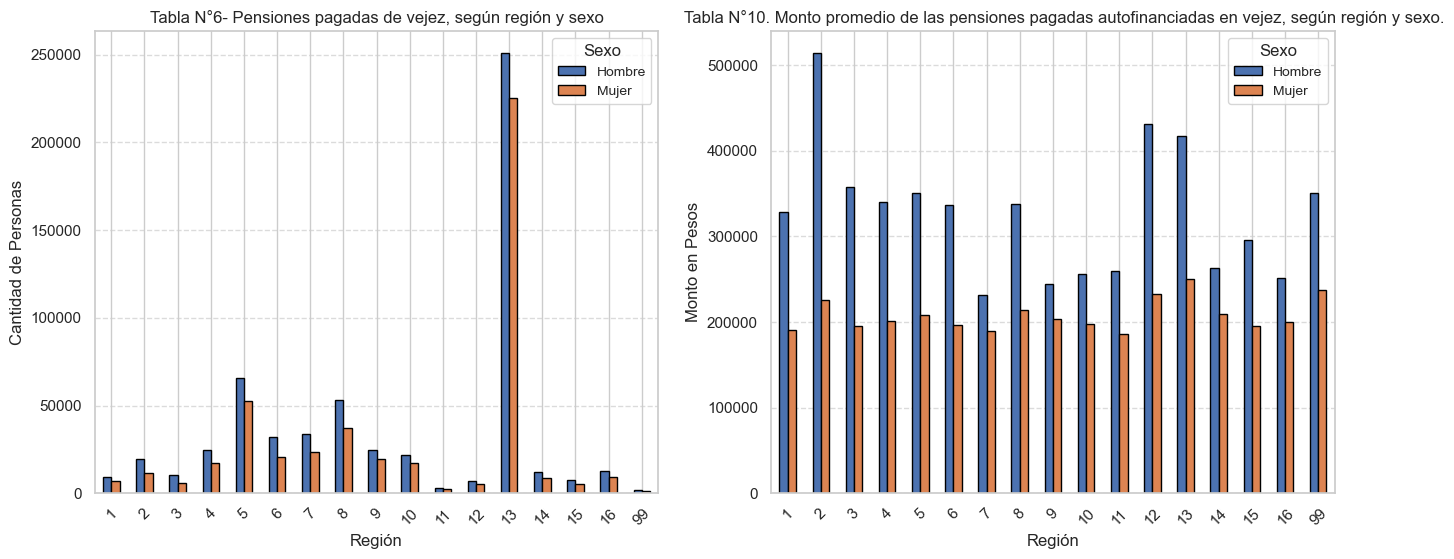

In [378]:
Total_Personas_AFP = pd.read_excel('Total_Personas_PagadasBoletinAFP_dic_2022.xlsx')
Monto_Pagado_AFP = pd.read_excel('Monto_promedio_PagadoBoletinAFP_dic_2022.xlsx')

# Crear subplots para los dos gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico de barras para visualizar el conteo de hombres y mujeres por región según boletin AFP
df_personas = Total_Personas_AFP[['region', 'Hombre', 'Mujer']].sort_values(by='region').set_index('region')

# Primer gráfico: Monto total pagado por la AFP según boletín
df_personas.plot(kind='bar', ax=axes[0], edgecolor='black')
axes[0].set_title('Tabla N°6- Pensiones pagadas de vejez, según región y sexo', fontsize=12)
axes[0].set_xlabel('Región', fontsize=12)
axes[0].set_ylabel('Cantidad de Personas', fontsize=12)
axes[0].legend(title='Sexo', labels=['Hombre', 'Mujer'], fontsize=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de barras para visualizar el conteo de hombres y mujeres por región según boletin AFP
df_promedio = Monto_Pagado_AFP[['region', 'Autofinanciada Hombres', 'Autofinanciada Mujeres']].sort_values(by='region').set_index('region')

# Segundo gráfico: Monto promedio pagado a los jubilados según boletín AFP
df_promedio.plot(kind='bar', ax=axes[1], edgecolor='black')
axes[1].set_title('     Tabla N°10. Monto promedio de las pensiones pagadas autofinanciadas en vejez, según región y sexo.', fontsize=12)
axes[1].set_xlabel('Región', fontsize=12)
axes[1].set_ylabel('Monto en Pesos', fontsize=12)
axes[1].legend(title='Sexo', labels=['Hombre', 'Mujer'], fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


**Datos estadisticos del Sistema de Pensiones N°7 - diciembre 2022**

La Superintendencia de Pensiones en Chile en el informe número ocho, de marzo 2023, destaca lo siguiente: 
Las regiones que concentran el mayor número de pensionadas y pensionados son la Metropolitana, seguida por la de Valparaíso y la del Biobío. 


En relación al monto pagado, es **Antofagasta la región donde las y los pensionados obtienen un mayor monto autofinanciado**, con 399.542 pesos. Por otro lado, En cambio la región del Maule, con 202.597 pesos tiene el menor monto. 

Por otro lado, el promedio de la pensión autofinanciada en Chile en el mes de marzo pasado fue de a 294.226 pesos, pero la diferencia entre hombres y mujeres es significativa. Los hombres recibieron, en promedio, 355.289 pesos. Las mujeres, 218.591 pesos. Es decir, **las mujeres reciben 136.698 pesos menos de pensión en comparacion a los hombres**.



**Carga, revisión, limpieza y análisis descriptivo de los datos**.

Se trabajará con un archivo excel que solo contiene catorce variables. El archivo original, STATA; de la CASEN 2022, 
tiene 917 variables y 202.231 casos. El tamaño del archivo es de 1.61 GB y no se puede almacenar en el git hub 
por razones de espacio. 

Lo primero es generar una lista con las variables a cargar: 

cols =  ['region','area','qaut','edad','sexo','esc',
'y7', 'yah1','yah2', 'yrut', 'yre1','yre2', 'yre3',
'y2803c']

El archivo se crea usando el **comando .to_excel()**

_Variables a cargar y su etiqueta:

- __region__ (Región): categorica
- __sexo__ (Sexo): categórica, dicotómica, hombre=1, mujer =2
- __area__ (Área): categórica, dicotómica
- __qaut__ (Nivel Socioeconómico de la UPM): categorica
- __esc__ (Años de escolaridad (edad >= 15)): discreta
- __y2803c__ (Jubilación o pensión de vejez corregido): continua
- __edad__ (Edad): discreta
- __y7__ (Mes pasado, cuánto dinero retiró de su negocio para gastos propios): continua
- __yre1__ (Arriendos de propiedades urbanas): continua
- __yah1__ (Intereses por depósitos): continua
- __yah2__ (Dividendo por acciones o bonos financieros): continua
- __yrut__ (Retiro de utilidades): continua
- __yre2__ (Arriendos de propiedades agrícolas): continua
- __yre3__ (Arriendos de propiedades por temporadas): continua



Se crea el data frame y se revisan los valores con el **comando .info()**

In [385]:
df = pd.read_excel('datos_analisis.xlsx')
print(df.shape)
df.info()

(202231, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202231 entries, 0 to 202230
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   region  202231 non-null  int64  
 1   area    202231 non-null  int64  
 2   qaut    202111 non-null  float64
 3   edad    202231 non-null  int64  
 4   sexo    202231 non-null  int64  
 5   esc     165248 non-null  float64
 6   y7      23970 non-null   float64
 7   yah1    933 non-null     float64
 8   yah2    279 non-null     float64
 9   yrut    294 non-null     float64
 10  yre1    4092 non-null    float64
 11  yre2    164 non-null     float64
 12  yre3    281 non-null     float64
 13  y2803c  7508 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 21.6 MB


Se genera estadístico descriptivo para revisar valores atípicos, los rangos, etc. Se usa el **comando .describe()**

In [387]:
estadisticos_df = df.describe().round(0)

# Transponer el DataFrame (intercambiar filas y columnas)
estadisticos_trans = estadisticos_df.transpose()

estadisticos_trans

,count,mean,std,min,25%,50%,75%,max
region,202231.0,9.0,4.0,1.0,5.0,8.0,13.0,16.0
area,202231.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0
qaut,202111.0,3.0,1.0,1.0,1.0,2.0,4.0,5.0
edad,202231.0,39.0,23.0,0.0,20.0,38.0,58.0,120.0
sexo,202231.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0
esc,165248.0,11.0,4.0,0.0,8.0,12.0,14.0,29.0
y7,23970.0,432761.0,796769.0,-88.0,100000.0,300000.0,500000.0,40000000.0
yah1,933.0,90618.0,355862.0,83.0,7750.0,20833.0,58333.0,6000000.0
yah2,279.0,201053.0,652800.0,167.0,8333.0,25000.0,83333.0,5416667.0
yrut,294.0,690176.0,1496395.0,417.0,66667.0,250000.0,666667.0,16666667.0


In [388]:
# limpieza de datos

df = df[df['y7'] != -88]

# Crear un nuevo DataFrame con las columnas concatenadas
new_df = pd.concat([df, pd.DataFrame({'sexo_dic': df['sexo'].replace({1: 0, 2: 1}),
                                      'area_dic': df['area'].replace({1: 0, 2: 1})})], axis=1)

# Si es necesario, puedes asignar el nuevo DataFrame de vuelta a 'df'
df_CASEN = new_df.copy()

**Gráficos**

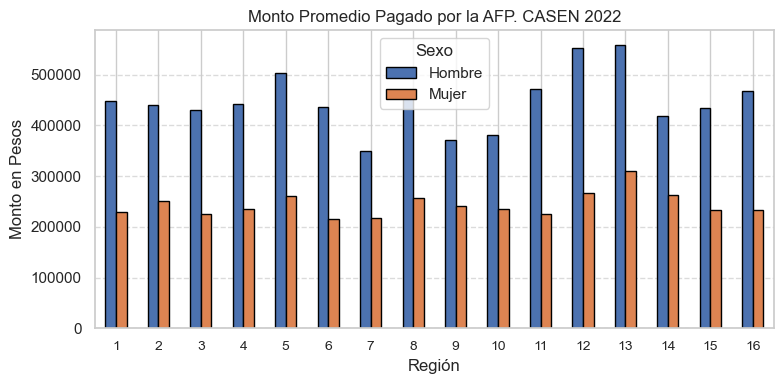

In [390]:
# Calcular el monto promedio pagado ('y2803c') por región y sexo

average_payment = df_CASEN.groupby(['region', 'sexo'])['y2803c'].mean().unstack(fill_value=0)

# Renombrar columnas para claridad: "Mujer" para sexo 2, "Hombre" para sexo 1
average_payment.columns = ['Hombre', 'Mujer']

# Crear un gráfico de barras para visualizar el conteo de hombres y mujeres por región
average_payment.plot(kind='bar', figsize=(8, 4), edgecolor='black')

# Configuración del gráfico
plt.title('Monto Promedio Pagado por la AFP. CASEN 2022', fontsize=12)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Monto en Pesos', fontsize=12)
plt.legend(title='Sexo', labels=['Hombre', 'Mujer'])
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Gráfico de la variable Monto Pagado de la AFP obtenido de los datos de la CASEN. 

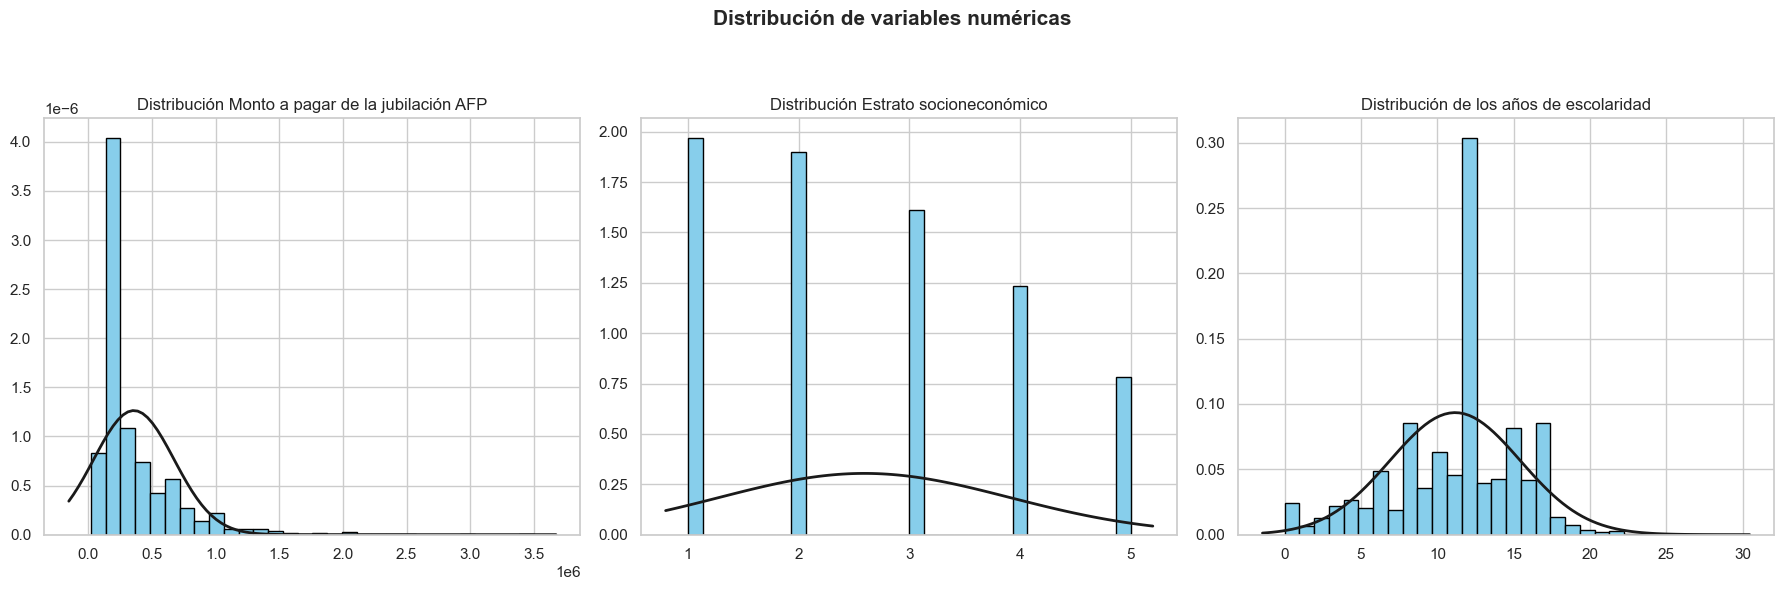

In [392]:
# Crear una figura y subgráficos (subplots)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


# Subgráfico 1 - Histograma de Años de Escolaridad
axs[0].hist(df_CASEN['y2803c'], bins=30, color='skyblue', edgecolor='black', density=True)

# Ajuste de distribución normal
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)

# Utilizar la media y la desviación estándar de la columna
mean_y2803c = np.mean(df_CASEN['y2803c'])
std_y2803c = np.std(df_CASEN['y2803c'])
p = norm.pdf(x, mean_y2803c, std_y2803c)

axs[0].plot(x, p, 'k', linewidth=2)
axs[0].set_title('Distribución Monto a pagar de la jubilación AFP')


# Subgráfico 2 - Histograma de Años de Escolaridad
axs[1].hist(df['qaut'], bins=30, color='skyblue', edgecolor='black', density=True)

# Ajuste de distribución normal
xmin, xmax = axs[1].get_xlim()
x = np.linspace(xmin, xmax, 100)

# Utilizar la media y la desviación estándar de la columna
mean_qaut = np.mean(df_CASEN['qaut'])
std_qaut = np.std(df_CASEN['qaut'])

# Utilizar la media y la desviación estándar de la columna
p = norm.pdf(x, mean_qaut, std_qaut)

axs[1].plot(x, p, 'k', linewidth=2)
axs[1].set_title('Distribución Estrato socioneconómico')


# Subgráfico 2 - Histograma de Años de Escolaridad
axs[2].hist(df_CASEN['esc'], bins=30, color='skyblue', edgecolor='black', density=True)

# Ajuste de distribución normal
xmin, xmax = axs[2].get_xlim()
x = np.linspace(xmin, xmax, 100)

# Utilizar la media y la desviación estándar de la columna
mean_esc = np.mean(df_CASEN['esc'])
std_esc = np.std(df_CASEN['esc'])

# Utilizar la media y la desviación estándar de la columna
p = norm.pdf(x, mean_esc, std_esc)

axs[2].plot(x, p, 'k', linewidth=2)
axs[2].set_title('Distribución de los años de escolaridad')


fig.tight_layout()
plt.subplots_adjust(top=0.8)  # Ajuste para que el título no se solape con los subgráficos
fig.suptitle('Distribución de variables numéricas', fontsize=15, fontweight="bold")
plt.show()

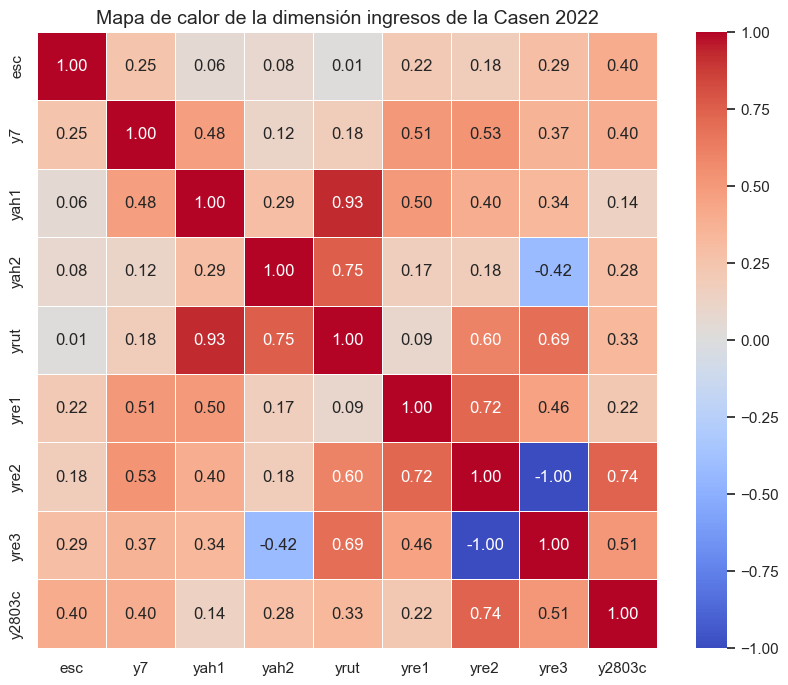

In [393]:
# Selecciona las columnas de interés
columnas_interes = df_CASEN[['esc', 'y7', 'yah1',
                       'yah2', 'yrut', 'yre1','yre2', 
                       'yre3', 'y2803c'
                       ]]

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea un mapa de calor a partir de las columnas seleccionadas
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(columnas_interes.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")  # Calcula la correlación 
                                                                                   # y muestra los valores

plt.title("Mapa de calor de la dimensión ingresos de la Casen 2022", fontsize=14)  
plt.show()

El monto de la jubilación recibido por los adultos mayores, es parte del módulo ingresos. La dimensión ingresos aborda las diferentes categorías de ingresos que reciben las personas y los hogares, esto es, los ingresos primarios, constituidos por los ingresos provenientes del trabajo (de los asalariados y de los empleadores y trabajadores por cuenta propia) y de la propiedad (retornos por activos financieros y no financieros), así como las transferencias corrientes, compuestas por las jubilaciones, pensiones y montepíos, los subsidios o transferencias monetarias del Estado y las diversas transferencias corrientes entre hogares.

Las preguntas de la encuesta mide todo los tipos pensiones que existen. Sin embargo, para este estudio solo se usará la pregunta: monto de jubilación entregada por las AFP corregida, denominada: ‘y2803c’, se excluye todos los otros ingresos que aporta el Estado; como la APS y la PGU.

El análisis del mapa de calor muestra correlaciones interesantes entre el monto de la pensión y otras variables asociadas al patrimonio.


### Regresión Lineal Simple



**Especificación** 



La función base es entre el monto de la jubilacion entregado por la AFP y el nivel de educación:

$$ \text{Monto jubilacion AFP} = f(Educacion))$$


**Modelo poblaciónal y estimación**

Modelo según la población:

$$ \text{Monto de la jubilación AFP}_i = \alpha + \beta \text{Años de educación}_i + \mu_i$$

Estimadores para la muestra:

$$\hat{ \text{Monto de la Jubilacion AFP}}_i = \hat{\alpha} + \hat{\beta} \text{Años de educación}_i $$




### Primer modelo:

En este modelo los datos se **agrupan en la variable región**. 


Modelo según la población:

### $$ \text{Monto de la jubilación AFP}_i = \alpha + \beta \text{Años de educación}_i + \mu_i$$

In [398]:
# Agrupar por 'region' y aplicar funciones de agregación
#df_prep = df.agg({'y28_2c': 'mean', 'y1': 'mean'}).reset_index()
df_regiones = df_CASEN.groupby('region').agg({'y2803c': 'mean', 'esc': 'mean'}).reset_index()

# Resultados agregados por región
df_regiones.head(30)


,region,y2803c,esc
0,1,328890.517375,11.567980
1,2,348876.017182,11.733616
2,3,339162.604563,11.072844
3,4,340398.296875,10.942651
4,5,382331.569755,11.484834
5,6,322368.290614,10.559138
6,7,281028.451796,10.315104
7,8,358714.518625,10.981279
8,9,305036.402500,10.397600
9,10,305347.811634,10.155427


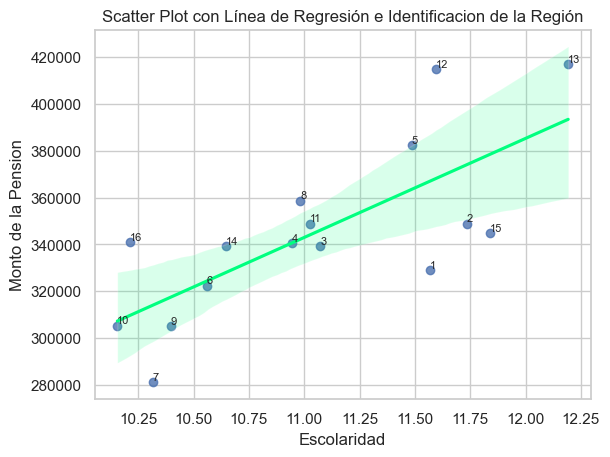

In [399]:
# DataFrame a analizar
sns.regplot(df_regiones, y='y2803c', x='esc', ci=95, line_kws={'color': 'springgreen'}) # El argumento ci controla el intervalo de confianza

# Procesar y agregar etiquetas de región a los puntos
for i, label in enumerate(df_regiones['region']):
    last_word = str(label).split()[-1]  # Obtener la última palabra de la etiqueta
    plt.text(df_regiones['esc'][i], df_regiones['y2803c'][i], last_word, fontsize=8, ha='left', va='bottom')

plt.ylabel('Monto de la Pension')
plt.xlabel('Escolaridad')
plt.title('Scatter Plot con Línea de Regresión e Identificacion de la Región')
plt.show()

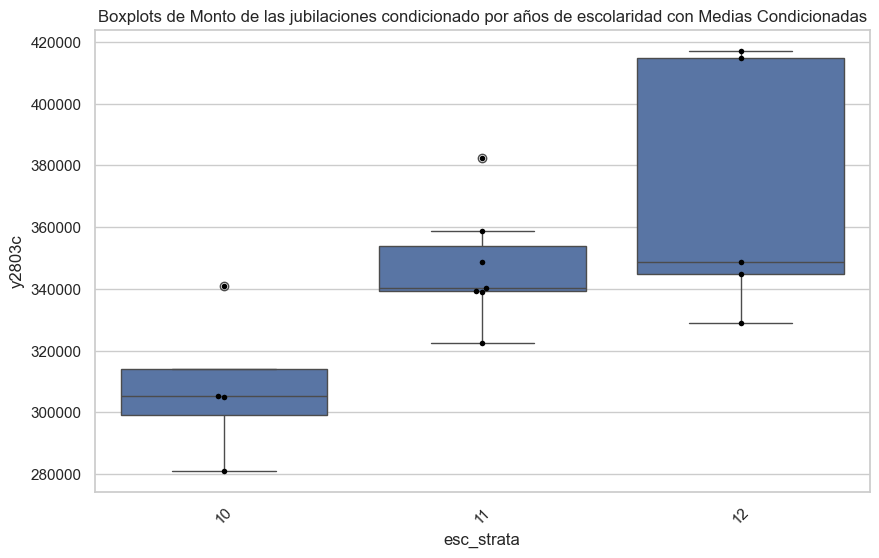

In [400]:
# Crear una nueva columna 'esc_strata' con los valores redondeados de 'esc'
df_regiones['esc_strata'] = df_regiones['esc'].round().astype(int)

# Crear el gráfico de boxplots
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.boxplot(data=df_regiones, x='esc_strata', y='y2803c')

# Agregar puntos para mostrar las medias condicionadas
sns.swarmplot(data=df_regiones, x='esc_strata', y='y2803c', color='black', size=4)

plt.xlabel('esc_strata')
plt.ylabel('y2803c')
plt.title('Boxplots de Monto de las jubilaciones condicionado por años de escolaridad con Medias Condicionadas')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario

plt.show()

In [401]:
# Eliminar filas con valores NaN
df_clean = df_regiones.dropna(subset=['y2803c', 'esc'])

# Agregar una columna de constantes para el término constante en el modelo
df_clean.loc[:, 'constante'] = 1

# Definir las variables dependiente e independiente
y = df_clean['y2803c']
X = df_clean[['constante', 'esc']]  # Usar 'constante' como término constante

# Ajustar el modelo de regresión lineal
simple_agrup_region = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(simple_agrup_region.summary())

# Prueba de hipótesis sobre la variable de escolaridad
print("\nPrueba de hipótesis:")
print("\nH0: La escolaridad no tiene efecto significativo en el monto a pagar de la jubilacion de la AFP")
print("H1: La escolaridad tiene un efecto significativo en el monto a pagar de la jubilacion de la AFP")

# Definimos nuestra hipótesis nula
# El valor p está asociado con la variable escolaridad (coeficiente)
valor_p_escolaridad = simple_agrup_region.pvalues.iloc[1]

# Nivel de significancia (usualmente 0.05)
nivel_significancia = 0.05

if valor_p_escolaridad < nivel_significancia:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, rechazamos la hipótesis nula.")
    print("\nLa escolaridad tiene un efecto significativo en el monto a pagar de la jubilacion de la AFP.")
else:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("\nNo hay suficiente evidencia para afirmar que la escolaridad tenga un efecto significativo en el monto a pagar de la jubilacion de la AFP.")


                            OLS Regression Results                            
Dep. Variable:                 y2803c   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     16.79
Date:                Sun, 12 Jan 2025   Prob (F-statistic):            0.00109
Time:                        22:21:36   Log-Likelihood:                -183.90
No. Observations:                  16   AIC:                             371.8
Df Residuals:                      14   BIC:                             373.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constante  -1.224e+05   1.14e+05     -1.071      0.3

C:\Users\Paula\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


#### Interpretación del modelo



La constante (𝛽0) no es relevante en el contexto de la escolaridad.  

El coeficiente de escolaridad (𝛽Años de educación cuyo valor es 42300) indica que por cada año de estudio el monto de la jubilación pagada por la AFP aumenta en 42.300 pesos.   

Dado que el coeficiente de escolaridad es positivo, se interpreta que un aumento en la escolaridad está asociado con un aumento en el monto de la jubilación, el resto se mantiene constante.



### Segundo modelo:

El modelo se aplica a la **muestra total sin agrupamiento** de ningún tipo. 

Modelo según la población:


### $$ \text{Monto de la jubilación AFP}_i = \alpha + \beta \text{Años de educación}_i + \mu_i$$


In [404]:
# Eliminar filas con valores NaN
df_clean = df_CASEN.dropna(subset=['y2803c', 'esc'])

# Agregar una columna de constantes para el término constante en el modelo
df_clean.loc[:, 'constante'] = 1


# Definir las variables dependiente e independiente
y = df_clean['y2803c']
X = df_clean[['constante', 'esc']]

# Ajustar el modelo de regresión lineal
simple_totaldatos = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(simple_totaldatos.summary())

# Prueba de hipótesis sobre la variable de escolaridad
print("\nPrueba de hipótesis:")
print("\nH0: La escolaridad no tiene efecto significativo en el monto a pagar de la jubilacion de la AFP")
print("H1: La escolaridad tiene un efecto significativo en el monto a pagar de la jubilacion de la AFP")

# Definimos nuestra hipótesis nula
# El valor p está asociado con la variable escolaridad (coeficiente)
valor_p_escolaridad = simple_totaldatos.pvalues.iloc[1]

# Nivel de significancia (usualmente 0.05)
nivel_significancia = 0.05

if valor_p_escolaridad < nivel_significancia:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, rechazamos la hipótesis nula.")
    print("\nLa escolaridad tiene un efecto significativo en el monto a pagar de la jubilacion de la AFP.")
else:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("\nNo hay suficiente evidencia para afirmar que la escolaridad tenga un efecto significativo en el monto a pagar de la jubilacion de la AFP.")


                            OLS Regression Results                            
Dep. Variable:                 y2803c   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1440.
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          4.88e-288
Time:                        22:21:36   Log-Likelihood:            -1.0350e+05
No. Observations:                7396   AIC:                         2.070e+05
Df Residuals:                    7394   BIC:                         2.070e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constante   1.035e+05   7492.827     13.812      0.0

C:\Users\Paula\AppData\Local\Temp\ipykernel_9268\3063754458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'constante'] = 1



#### Interpretación del modelo



En relación a los coeficientes que son parte de la regresión:

La constante (103500) representa el valor esperado del monto de la jubilación cuando todas las variables independientes son cero. En este contexto no tiene significado. 


El coeficiente de escolaridad (25870) indica que por cada cada de estudios formales el monto de la jubilación se ve incrementado en 25.870 pesos,  manteniendo constantes otras variables en el modelo.

En resumen, según este modelo, la escolaridad tiene un impacto significativo en el monto de la jubilación. 

La significancia del modelo en conjunto (Prob (F-statistic)) y el porcentaje de variabilidad explicada (R-squared) sugieren que este modelo tiene utilidad para explicar el monto de la jubilación en el contexto de los datos totales.








### Regresión Lineal Múltiple 


A partir de este momento se empieza con el **enriquecimiento del modelo**. 


### Tercer modelo:

Se le **agrega la variable sexo** y se **suma la interacción entre sexo y  educación**

Modelo según la población:


### $$ \text{Monto de la jubilación AFP}_i = \alpha_0 + \beta_1 educ+ \beta_2 sexo + (\beta_1 educ* \beta_2 sexo) +u $$


sexo
2    106215
1     94945
Name: count, dtype: int64 

sexo_dic
1    106215
0     94945
Name: count, dtype: int64 

                            OLS Regression Results                            
Dep. Variable:                 y2803c   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     1055.
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:21:37   Log-Likelihood:            -1.0284e+05
No. Observations:                7396   AIC:                         2.057e+05
Df Residuals:                    7392   BIC:                         2.057e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]

C:\Users\Paula\AppData\Local\Temp\ipykernel_9268\3827268900.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear_mod.loc[:, 'constante'] = 1


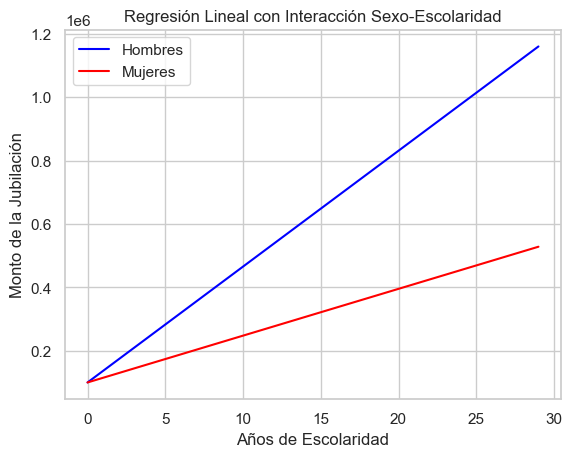

In [407]:
# Columna a estudiar
frecuencia_sex_dic = df_CASEN['sexo_dic'].value_counts()
frecuencia_sex     = df_CASEN['sexo'].value_counts()

# Mostrar la frecuencia de la variable 
print(frecuencia_sex,"\n")
print(frecuencia_sex_dic,"\n")


# Crear una variable de interacción entre 'esc' y 'sexo'
df_CASEN['interaccion_sexo_dic_esc'] = df_CASEN['esc'] * df_CASEN['sexo_dic']

# Eliminar filas con valores NaN
df_clear_mod = df_CASEN.dropna(subset=['y2803c', 'esc', 'sexo', 'interaccion_sexo_dic_esc'])

# Agregar una columna de constantes para el término constante en el modelo
df_clear_mod.loc[:, 'constante'] = 1


# Ajustar el modelo de regresión lineal con la variable de interacción
modelo = sm.OLS(df_clear_mod['y2803c'], sm.add_constant(df_clear_mod[['constante','esc', 'sexo', 'interaccion_sexo_dic_esc']])).fit()

# Obtener los resultados de la regresión
resultados = modelo.summary()
print(resultados)

# Prueba de hipótesis sobre la variable de escolaridad
print("\nPrueba de hipótesis:")
print("\nH0: La escolaridad no tiene efecto significativo en el monto a pagar de la jubilación de la AFP")
print("H1: La escolaridad tiene un efecto significativo en el monto a pagar de la jubilación de la AFP")

# Definimos nuestra hipótesis nula
# El valor p está asociado con la variable escolaridad (coeficiente)
valor_p_escolaridad = modelo.pvalues.iloc[1]

# Nivel de significancia (usualmente 0.05)
nivel_significancia = 0.05

if valor_p_escolaridad < nivel_significancia:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, rechazamos la hipótesis nula.")
    print("\nLa escolaridad tiene un efecto significativo en el monto a pagar de la jubilación de la AFP.")
else:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("\nNo hay suficiente evidencia para afirmar que la escolaridad tenga un efecto significativo en el monto a pagar de la jubilación de la AFP.")

# Define esc_range, por ejemplo, de 0 a 20 con cierto paso
esc_range = np.arange(0, 30, 1)

# Graficar la regresión
plt.xlabel('Años de Escolaridad')
plt.ylabel('Monto de la Jubilación')
plt.title('Regresión Lineal con Interacción Sexo-Escolaridad')

# Añadir la línea de regresión para hombres
interaccion_sexo_hombres = 0  # Si el sexo es 0 (hombres), la interacción es 0
y_pred_hombres = modelo.params['constante'] + modelo.params['esc'] * esc_range + interaccion_sexo_hombres * modelo.params['interaccion_sexo_dic_esc'] * esc_range
plt.plot(esc_range, y_pred_hombres, color='blue', label='Hombres')

# Añadir la línea de regresión para mujeres
interaccion_sexo_mujeres = 1  # Si el sexo es 1 (mujeres), la interacción es 1
y_pred_mujeres = modelo.params['constante'] + modelo.params['esc'] * esc_range + interaccion_sexo_mujeres * modelo.params['interaccion_sexo_dic_esc'] * esc_range
plt.plot(esc_range, y_pred_mujeres, color='red', label='Mujeres')

plt.legend()
plt.show()


#### Interpretación del modelo


En consideración a los coeficientes:

La constante (100.000): Representa el valor esperado del monto de la jubilación cuando todas las variables independientes son cero. En este caso no tiene significado su valor.

Escolaridad (36550): Indica que por cada año más de escolaridad el monto de la pensión aumenta en 36.550 pesos mensuales. manteniendo constante el efecto de otras variables en el modelo. 

Sexo (5973): Representa el efecto adicional en el monto de la jubilación cuando la variable sexo es 1 (mujer) en comparación con la variable que es 0 (hombre). En este caso las mujeres, en promedio,  tendrían un monto de jubilación mayor,  en comparación a los hombres a igual nivel de educación. El sueldo para ellas aumenta en 5.973 pesos. Lo demás se mantiene constante

Interacción sexo y escolaridad (-21780): Pero cuando la variable sexo interacciona con la variable educación el resultado es lo opuesto. Dado que es negativo (-21.780), se sugiere que la relación entre la escolaridad y el monto de la jubilación es menor para las mujeres en comparación a los hombres a igual nivel de escolaridad. Un año más de educación para las mujeres significa -21.780 pesos de jubilación mensual en comparacion a la jubilación promedio de los hombres.

En resumen, el nivel de escolaridad está positivamente relacionado con el monto de la jubilación. Además, hay un efecto adicional positivo en el monto de la jubilación para las mujeres en comparación con los hombres. 

Sin embargo, el resultado de la la interacción  negativa sugiere que el impacto de la escolaridad es menor para las mujeres en comparación con los hombres. Lo que se puede explicar en que en la variable sexo las mujeres contienen algunos valores más altos que distorsionan el resultado del coeficiente. 




### Cuarto modelo:

Se **elimina la variable sexo** en el modelo de regresión pero se **mantiene la interacción entre sexo y educación**.



Modelo según la población:

### $$ \text{Monto de la jubilación AFP}_i = \alpha_0 + \beta_1 educ + (\beta_1 educ* \beta_2 sexo) +u $$


sexo_dic
1    106215
0     94945
Name: count, dtype: int64 

                            OLS Regression Results                            
Dep. Variable:                 y2803c   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     1582.
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:21:37   Log-Likelihood:            -1.0284e+05
No. Observations:                7396   AIC:                         2.057e+05
Df Residuals:                    7393   BIC:                         2.057e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

C:\Users\Paula\AppData\Local\Temp\ipykernel_9268\625131469.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clea.loc[:, 'constante'] = 1


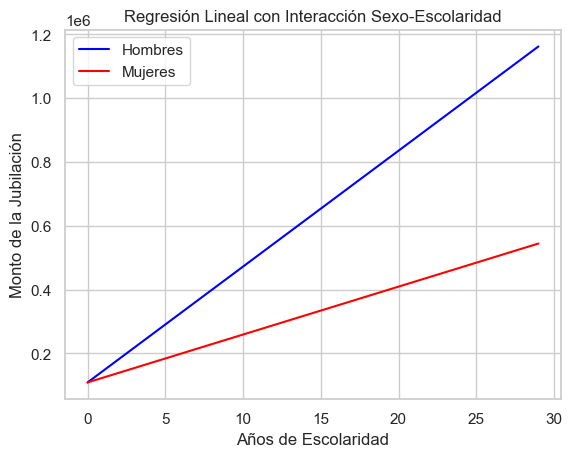

In [410]:
# Columna a estudiar
frecuencia_sex_dic = df_CASEN['sexo_dic'].value_counts()

# Mostrar la frecuencia de la variable 
print(frecuencia_sex_dic,"\n")

# Crear una variable de interacción entre 'esc' y 'sexo'
df_CASEN['interaccion_sexo_dic_esc'] = df_CASEN['esc'] * df_CASEN['sexo_dic']

# Eliminar filas con valores NaN
df_clea = df_CASEN.dropna(subset=['y2803c', 'esc', 'interaccion_sexo_dic_esc'])

# Agregar una columna de constantes para el término constante en el modelo
df_clea.loc[:, 'constante'] = 1


# Ajustar el modelo de regresión lineal con la variable de interacción
modelo_1 = sm.OLS(df_clea['y2803c'], sm.add_constant(df_clea[['constante','esc', 'interaccion_sexo_dic_esc']])).fit()

# Obtener los resultados de la regresión
resultados = modelo_1.summary()
print(resultados)

# Prueba de hipótesis sobre la variable de escolaridad
print("\nPrueba de hipótesis:")
print("\nH0: La escolaridad no tiene efecto significativo en el monto a pagar de la jubilación de la AFP")
print("H1: La escolaridad tiene un efecto significativo en el monto a pagar de la jubilación de la AFP")

# Definimos nuestra hipótesis nula
# El valor p está asociado con la variable escolaridad (coeficiente)
valor_p_escolaridad = modelo_1.pvalues.iloc[1]

# Nivel de significancia (usualmente 0.05)
nivel_significancia = 0.05

if valor_p_escolaridad < nivel_significancia:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, rechazamos la hipótesis nula.")
    print("\nLa escolaridad tiene un efecto significativo en el monto a pagar de la jubilación de la AFP.")
else:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("\nNo hay suficiente evidencia para afirmar que la escolaridad tenga un efecto significativo en el monto a pagar de la jubilación de la AFP.")

# Define esc_range, por ejemplo, de 0 a 20 con cierto paso
esc_range = np.arange(0, 30, 1)

# Graficar la regresión
plt.xlabel('Años de Escolaridad')
plt.ylabel('Monto de la Jubilación')
plt.title('Regresión Lineal con Interacción Sexo-Escolaridad')

# Añadir la línea de regresión para hombres
interaccion_sexo_hombres = 0  # Si el sexo es 0 (hombres), la interacción es 0
y_pred_hombres = modelo_1.params['constante'] + modelo_1.params['esc'] * esc_range + interaccion_sexo_hombres * modelo_1.params['interaccion_sexo_dic_esc'] * esc_range
plt.plot(esc_range, y_pred_hombres, color='blue', label='Hombres')

# Añadir la línea de regresión para mujeres
interaccion_sexo_mujeres = 1  # Si el sexo es 1 (mujeres), la interacción es 1
y_pred_mujeres = modelo_1.params['constante'] + modelo_1.params['esc'] * esc_range + interaccion_sexo_mujeres * modelo_1.params['interaccion_sexo_dic_esc'] * esc_range
plt.plot(esc_range, y_pred_mujeres, color='red', label='Mujeres')

plt.legend()
plt.show()

#### Interpretación del modelo 


Constante (1.09e+05): Es la estimación del monto de la jubilación cuando todas las demás variables son cero. En este caso no tiene sentido interpretarla. 

Escolaridad (3.631e+04): En este caso, un aumento de un año en la escolaridad se asocia con un aumento de 36.310 pesos en el monto de la jubilación a pagar. Lo demás se mantiene constante

Interacción entre escolaridad y sexo (-2.13e+04): Este coeficiente representa cómo la relación entre la escolaridad y el monto de jubilación difiere para diferentes valores de la variable sexo. En este caso, un aumento en la interacción se asocia con una disminución de 21.300 pesos en el monto de la jubilación pagada por la AFP mensualmente a las mujeres en comparación a los hombres a igual nivel educacional. Lo demás se mantiene constante.



### Quinto modelo:

Se considera la **interacción entre lo rural, urbano y la escolaridad**. Se **elimina la variable sexo**. 

Modelo según la población:

### $$ \text{Monto de la jubilación AFP}_i = \alpha_0 + \beta_1 educ + (\beta_1 educ* \beta_2 área) +ui $$



area_dic
0    160631
1     40529
Name: count, dtype: int64 

                            OLS Regression Results                            
Dep. Variable:                 y2803c   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     481.7
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          6.57e-286
Time:                        22:21:37   Log-Likelihood:            -1.0350e+05
No. Observations:                7396   AIC:                         2.070e+05
Df Residuals:                    7392   BIC:                         2.070e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

C:\Users\Paula\AppData\Local\Temp\ipykernel_9268\188963880.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear.loc[:, 'constante'] = 1


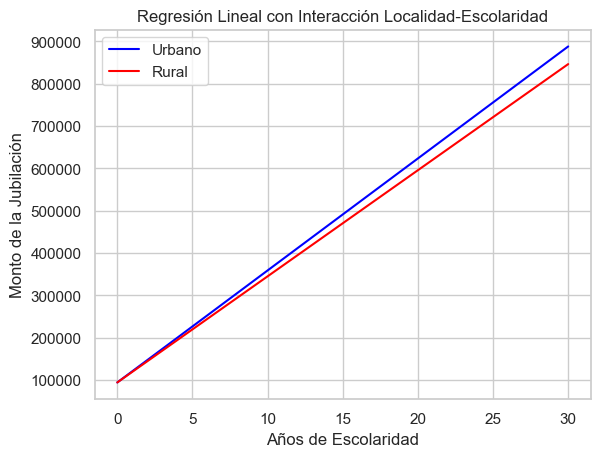

In [413]:
# Columna a estudiar
frecuencia_area_dic = df_CASEN['area_dic'].value_counts()

# Mostrar la frecuencia de la variable 
print(frecuencia_area_dic,"\n")

# Crear una variable de interacción entre 'esc' y 'sexo'
df_CASEN['interaccion_area_esc'] = df_CASEN['esc'] * df_CASEN['area_dic']

# Eliminar filas con valores NaN
df_clear = df_CASEN.dropna(subset=['y2803c', 'esc', 'area_dic', 'interaccion_area_esc'])

# Agregar una columna de constantes para el término constante en el modelo
df_clear.loc[:, 'constante'] = 1


# Ajustar el modelo de regresión lineal con la variable de interacción
modelo_area = sm.OLS(df_clear['y2803c'], sm.add_constant(df_clear[['constante','esc', 'area_dic', 'interaccion_area_esc']])).fit()

# Obtener los resultados de la regresión
resultados = modelo_area.summary()
print(resultados)

# Prueba de hipótesis sobre la variable de escolaridad
print("\nPrueba de hipótesis:")
print("\nH0: La escolaridad no tiene efecto significativo en el monto a pagar de la jubilación de la AFP")
print("H1: La escolaridad tiene un efecto significativo en el monto a pagar de la jubilación de la AFP")

# Definimos nuestra hipótesis nula
# El valor p está asociado con la variable escolaridad (coeficiente)
valor_p_escolaridad = modelo_area.pvalues.iloc[1]

# Nivel de significancia (usualmente 0.05)
nivel_significancia = 0.05

if valor_p_escolaridad < nivel_significancia:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, rechazamos la hipótesis nula.")
    print("\nLa escolaridad tiene un efecto significativo en el monto a pagar de la jubilación de la AFP.")
else:
    print(f"\nEl valor p es {valor_p_escolaridad}, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("\nNo hay suficiente evidencia para afirmar que la escolaridad tenga un efecto significativo en el monto a pagar de la jubilación de la AFP.")

# Define esc_range, por ejemplo, de 0 a 20 con cierto paso
esc_range = np.arange(0, 31, 1)

# Graficar la regresión
plt.xlabel('Años de Escolaridad')
plt.ylabel('Monto de la Jubilación')
plt.title('Regresión Lineal con Interacción Localidad-Escolaridad')

# Añadir la línea de regresión para urbano
interaccion_area_urbana = 0  # Si el area es 0 (urbana), la interacción es 0
y_pred_hombres = modelo_area.params['constante'] + modelo_area.params['esc'] * esc_range + interaccion_area_urbana * modelo_area.params['interaccion_area_esc'] * esc_range
plt.plot(esc_range, y_pred_hombres, color='blue', label='Urbano')

# Añadir la línea de regresión para rural
interaccion_area_rural = 1  # Si el area es 1 (rural), la interacción es 1
y_pred_mujeres = modelo_area.params['constante'] + modelo_area.params['esc'] * esc_range + interaccion_area_rural * modelo_area.params['interaccion_area_esc'] * esc_range
plt.plot(esc_range, y_pred_mujeres, color='red', label='Rural')

plt.legend()
plt.show()


#### Interpretación del modelo 

Constante (94.400): Es la estimación del monto de la jubilación cuando todas las demás variables son cero (escolaridad, área, interacción). En este caso no es interpretable. 

Escolaridad (26.420): Indica que un año extra de educación formal se asocia con un aumento de 26.420 pesos en el monto de la jubilación. Lo demás se mantiene constante.

Area_(27.690): Representa el cambio esperado en el monto de la jubilación al comparar el área rural con el área urbana. Las personas jubiladas de las zonas rurales ganan  
27.690 pesos más en el monto de la jubilación en comparación a las personas de las zonas urbanas a igual nivel de estudios. Lo demás se mantiene constante.

Interacción área y escolaridad (-1126): Representa cómo la relación entre la escolaridad y la zona de residencia del jubilado difiere. En este caso, un año más de educación para los que viven en la zona rural significa la disminución de su monto de la jubilacion en 1.126  pesos en comparación a los que viven en zonas urbanas a igual nivel educacional. Lo demás se mantiene constante. 
    
La probabilidad asociada al estadístico F es extremadamente baja, lo que sugiere que al menos una de las variables explicativas en el modelo es significativamente diferente de cero.



## Comparación de los Modelos de Regresión: 

In [416]:
stargazer = Stargazer([simple_agrup_region, simple_totaldatos, modelo, modelo_1, modelo_area])
# Configurar el título con dos líneas
stargazer.title("Modelos analizados para la variable dependiente: Monto de la jubilación de la AFP.\n(expresado en pesos chilenos).")
stargazer.custom_columns(["Agrup_Reg", 'Sin_agrup', 'sex + inter_esc_sexo', 'Inter_esc_sex', 'Inter_area_esc'], [1, 1, 1, 1, 1])  
stargazer.add_custom_notes(["Notas personalizadas para la tabla."])
stargazer

## Evaluación y Conclusiones



El análisis de los resultados y los informes de la Superintendencia de Pensiones permite concluir que el modelo 4 es el más adecuado. Este modelo confirma que existe una relación significativa entre el nivel educacional de los jubilados y el monto de sus jubilaciones entregadas por las AFP.

El modelo considera la variable educación, expresada en años, junto con la variable “monto de la jubilación corregido”. Además, incluye la interacción entre las variables sexo y educación, mostrando que, incluso con el mismo nivel educativo, las mujeres enfrentan una desventaja en comparación con los hombres. Según los resultados, un año adicional de educación se asocia con un aumento promedio de 36.311 pesos en el monto de la jubilación, manteniendo constantes otras variables. Sin embargo, la interacción evidencia que las mujeres ganan 21.300 pesos menos que los hombres con el mismo nivel educativo.

En términos de ajuste, los valores obtenidos para esta regresión (R² ajustado: 0.300, Prob (F-statistic): 0.00, AIC: 2.057e+05, BIC: 2.057e+05) refuerzan la elección del modelo como el más adecuado para explicar la relación entre las variables en estudio. 

Las variables de la CASEN han sido fundamentales para el modelo de regresión. Sin embargo, es importante considerar que el monto de la jubilación refleja acciones gestadas en el pasado, como la vida laboral. Por ello, las variables relevantes deben ser aquellas que se han mantenido constantes en el tiempo, como el género o sexo. Variables como región y área representan datos específicos del momento en que se realizó la encuesta, pero no reflejan necesariamente condiciones durante la vida laboral del encuestado.

Para enriquecer el modelo, sería ideal incorporar variables relacionadas directamente con dimensiones laborales y previsionales, tales como: años de cotización y períodos sin cotización, tipo de contrato laboral: dependiente o independiente, monto imponible y pagos no imponibles realizados durante la vida laboral, bonificaciones entregadas por empleadores al momento de jubilar, salario imponible promedio en el mercado, impacto de la flexibilización y tercerización laboral en las cotizaciones previsionales, relación con otras fuentes de ingreso o patrimonio.

El modelo también evidencia la desigualdad en los montos de pensión entre hombres y mujeres, incluso con niveles educativos similares. Esto subraya la necesidad de abordar no solo las disparidades de género en el sistema de pensiones, sino también las inequidades en el mercado laboral y las políticas de previsión social. Aunque la educación emerge como una herramienta clave para reducir estas desigualdades, debe ser complementada con medidas específicas que cierren brechas estructurales.

Aunque el modelo 4 confirma información valiosa para el debate, no es suficiente para fundamentar decisiones de políticas públicas. Este análisis confirma que los años de educación están relacionados con el monto de la jubilación y que existen desigualdades persistentes. Sin embargo, para un enfoque integral, es necesario incorporar variables propias de las dimensiones laborales y previsionales mencionadas anteriormente.

En conclusión, este estudio resalta la importancia de la educación como un factor central para mejorar la equidad y reducir la pobreza en la vejez. No obstante, el debate debe ampliarse para incluir medidas que aborden las desigualdades estructurales en el mercado laboral y el sistema de pensiones, asegurando un sistema más justo y equitativo para todos los jubilados.



**Bibliografía**

Asociacion de AFP Chile. (2023). Recuperado de https://www.aafp.cl/

Superintendencia de Pensiones. SP (2023) Recuperado de https://www.spensiones.cl/portal/institucional/594/w3-channel.html

Ministerio de Desarrollo Social y Familia. (2023). Recuperado de  https://observatorio.ministeriodesarrollosocial.gob.cl/encuesta-casen-2022


